In [1]:
using constants
using types
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

electronicthermalPropsiso (generic function with 1 method)

In [2]:
Ts=collect(300.0:20.0:800.0)
#Ts=collect(663.8:0.01:664.0)#[663.0,663.1]
numofn=[-1.5e20]#,-7.3e19,-2.0e19,-0.22e19]#,-0.2e20]#,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
numofnn=[1e17]#,1e17,1e17,1e17]#,1e17]
xs=[0.3]#,0.3,0.3,0.3]#[0.287,0.3,0.262,0.332]#collect(0.0:0.01:1.0)

var0=[Ts[1],xs[1]]
Eoff=0.0
Ev(var)=Eoff
Ec(var)=Ev(var)+EgSiGe(var[1],var[2]) #var[1]:T var[2]:x

effMassV(var)=-1.2*me
effMassC(var)=0.321me#0.424*me#0.424*me#1.4/6^(2/3)*me

bandC=parBandTx(effMassC(var0),5.0,Ec(var0),[Ec],[effMassC],var0)
bandV=parBandTx(effMassV(var0),0.0,Ev(var0),[Ev],[effMassV],var0)
#bndstTx=BandStrucTx([bandV,bandC,bandC,bandC,bandC,bandC,bandC],var0)
bndstTx=BandStrucTx([bandC,bandC],var0)#,bandC,bandC,bandC,bandC,bandC,bandV],var0)
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst var[9]:NNI

md=effMassC([Ts[1],xs[1]])*6^(2/3)#1.4*me;
function Deftemp(band::parBandTx)
    if band==bandC
        return 7.0#10.5#15.0
    end
    if band==bandV        
        return 5.5#7.0
    end
end
ksi=21.0
tauAC(var)=tauAC_func(ClSiGe(var[4],var[2]),Deftemp(var[6]),var[2],var[1],var[3],var[6])#DefP(var[1])
tauII2(var)=tauII2_func(ksi*eps0,eps0,var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauNI(var)=tauNI_func(ksi*eps0,var[1],var[9])
vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
#vartau0=[bandC.effMass,Ts[1],1.0,xs[1],1.5,bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
tauTOTTx=tau_electron_B([tauAC,tauII2],vartau0)#tauNI,,tauII2,tauAC,
xmax=3.0
#T_EF_Dict=Dict()
#println("-3")

3.0

bandT1=parBandTx(effMassC(var0),0.0,Ec(var0),[Ec],[effMassC],var0)
bandT2=parBandTx(effMassC(var0),0.2,Ec(var0),[Ec],[effMassC],var0)
Es=collect(0.0:0.01:5.0)
ds1=Array{Float64,1}(length(Es))
ds2=Array{Float64,1}(length(Es))
ds3=Array{Float64,1}(length(Es))
ds4=Array{Float64,1}(length(Es))
ax=0.0
for (i,Ei) in enumerate(Es)
    ds1[i]=getDOS_SingleBand_E(bandT1,Ei)
    ds2[i]=getDOS_SingleBand_E(bandT2,Ei)    
    ds3[i]=1e46*sqrt(Ei+ax*Ei*Ei)*(1+2*ax*Ei)
    ds4[i]=1e46*sqrt(Ei)
end
plot(Es,ds1,linestyle="-",color="r")
plot(Es,ds2,linestyle="-",color="b")
plot(Es,ds3,linestyle="-",color="k")
plot(Es,ds3,linestyle="-",color="c")

In [3]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis)=electronicPropsiso(bndstTx,xs,Ts,numofn,tauTOTTx,xmax)

Efsr=Array{Float64,3}(length(Ts),length(numofn),length(xs))
for (i,iT) in enumerate(Ts)
    for (k,kx) in enumerate(xs) 
        for (j,jn) in enumerate(numofn)
            Efsr[i,j,k]=Efs[i,j,k]-Ec([iT,kx])
        end
    end
end
#println("-2")
T_EF_Dict=Dict()
for (Ti,Tx) in enumerate(Ts)
    T_EF_Dict[Tx]=(Efs[Ti])    
end
T_EF_Dict_Array=Array{Dict{Float64,Float64},2}(length(numofn),length(xs))
Dict_temp=Dict()
Efsr=Array{Float64,3}(length(Ts),length(numofn),length(xs))
for (j,jn) in enumerate(numofn)
    for (k,kx) in enumerate(xs) 
        for (i,iT) in enumerate(Ts)
            Efsr[i,j,k]=Efs[i,j,k]-Ec([iT,kx])
            Dict_temp[iT]=Efsr[i,j,k]
            T_EF_Dict_Array[j,k]=Dict_temp 
        end
    end
end


In [4]:
#println("-1")
#############Lattice Thermal Conductivity Parameters###############
thetaSiL=586.0 # K 
thetaSiT=240.0 # K
vSiL=8430.0    # m/s
vSiT=5840.0    # m/s
vGeL=4920.0    # m/s
vGeT=3540.0    # m/s
gammaL=0.9
gammaT=0.6
MSi=4.6637e-26 # kg
MGe=1.206e-25  # kg
VSi=2.0024e-29
#println("0")
Eh=3.8
Eep=3*q
xsp=xs[1]
Tp=300.0
p=1.0
D=20e-9
NP=0.0
a=2.65#0.488
alpha=0.5 #specularity factor
d=97.0e-9#

#println("1")


#vartauPH0=[[0.02],Ts[1],gammaL,gammaT,xsp,thetaCLx,thetaCTx,thetaCTx,MSi,MGe,VSi,a,T_EF_Dict,0.0]
vartauPH0=[ [0.02],  Ts[1],   gammaL,  gammaT, xsp,
    thetaSiL, thetaSiT, thetaSiT, MSi,   MGe, 
    VSi, a, T_EF_Dict_Array, Eep, alpha, 
    d, thetaSiL, thetaSiT, vSiL, vSiT, 
    vGeL, vGeT, p, NP,Tsindex=1,
    numberofnindex=1,xsindex=1]
thetaCLx=thetaCL(vartauPH0[12],vartauPH0[5],vartauPH0[17],vartauPH0[19],vartauPH0[11])
thetaCTx=thetaCT(vartauPH0[12],vartauPH0[5],vartauPH0[18],vartauPH0[19],vartauPH0[11])
#println("2")
tauPHNLf(var)=tauPH_NL(var[3],VSiGe(var[5]),var[1],var[2],MSiGe(var[5]),vSiGeL_PH(var[5]))
tauPHNTf(var)=tauPH_NT(var[4],VSiGe(var[5]),var[1],var[2],MSiGe(var[5]),vSiGeT_PH(var[5]))


tauPHULf(var)=tauPH_U(var[3],var[1],var[2],MSiGe(var[5]),vSiGeL_PH(var[5]),var[17])
tauPHUTf(var)=tauPH_U(var[4],var[1],var[2],MSiGe(var[5]),vSiGeT_PH(var[5]),var[18])

tauPHALLLf(var)=tauPH_ALL(var[9],var[10],var[5],VSiGe(var[5]),var[1],var[2],MSiGe(var[5]),vSiGeL_PH(var[5]))
tauPHALLTf(var)=tauPH_ALL(var[9],var[10],var[5],VSiGe(var[5]),var[1],var[2],MSiGe(var[5]),vSiGeT_PH(var[5]))

tauPHeLf(var)=tauPH_e(var[14],md,MSiGe(var[5])/VSiGe(var[5]),(var[13][var[26],var[27]])[var[2]],var[1],var[2],vSiGeL_PH(var[5]))
tauPHeTf(var)=tauPH_e(var[14],md,MSiGe(var[5])/VSiGe(var[5]),(var[13][var[26],var[27]])[var[2]],var[1],var[2],vSiGeT_PH(var[5]))

tauPHBLf(var)=tauPH_B(vSiGeL_PH(var[5]),var[14],var[15])
tauPHBTf(var)=tauPH_B(vSiGeT_PH(var[5]),var[14],var[15])
#println("3")
tauPHTOTL=tau_phonon_B([tauPHNLf,tauPHULf,tauPHALLLf,tauPHeLf],vartauPH0)#,tauPH_eLf ,tauPHALLLf ,tauPHBLf
tauPHNL=tau_phonon_B([tauPHNLf],vartauPH0)
tauPHRL=tau_phonon_B([tauPHULf,tauPHALLLf,tauPHeLf],vartauPH0) #,tauPHALLLf,tauPH_eLf] ,tauPHBLf


tauPHTOTTx=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHALLTf,tauPHeTf],vartauPH0) #tauPHALLTf,tauPH_eTf ,tauPHBTf
tauPHNTx=tau_phonon_B([tauPHNTf],vartauPH0)
tauPHRTx=tau_phonon_B([tauPHUTf,tauPHALLTf,tauPHeTf],vartauPH0) #,tauPHALLTf,tauPH_eTf ,tauPHBTf


tauPHTOTTy=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHALLTf,tauPHeTf],vartauPH0) #,tauPHALLTf,tauPH_eTf tauPHBTf
tauPHNTy=tau_phonon_B([tauPHNTf],vartauPH0)
tauPHRTy=tau_phonon_B([tauPHUTf,tauPHALLTf,tauPHeTf],vartauPH0) #,tauPHALLTf,tauPH_eTf ,tauPHBTf
#println("4")

tauPHL=[tauPHTOTL,tauPHNL,tauPHRL]
tauPHTx=[tauPHTOTTx,tauPHNTx,tauPHRTx]
xmax=1.0

1.0

In [5]:
@time klattice=thermalPropsiso(tauPHL,tauPHTx,tauPHTx,[vSiGeL_PH(xsp),vSiGeT_PH(xsp),vSiGeT_PH(xsp)])
xmax=3.0

  0.560462 seconds (808.87 k allocations: 282.951 MB, 5.16% gc time)


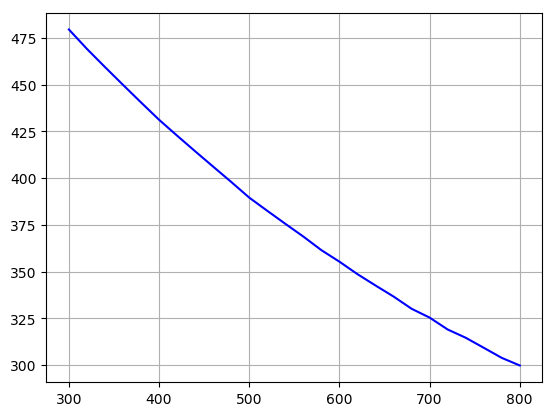

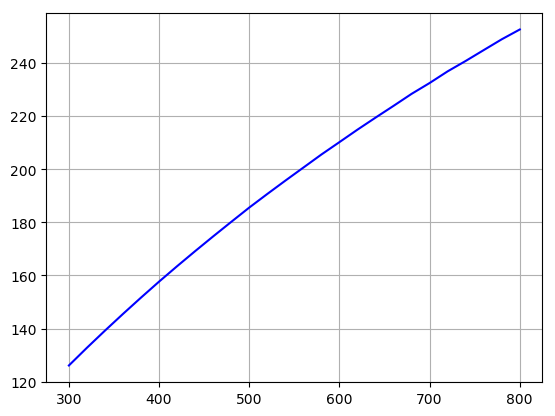

In [6]:
SiGe_Min_1700_Bulk_EC_T=[309.4827586207,389.6551724138,450,479.3103448276,504.3103448276,589.6551724138,979.3103448276,
    1039.6551724138,1110.3448275862,1189.6551724138,1199.1379310345]
SiGe_Min_1700_Bulk_EC_E=[1252.3364485981,1113.707165109,1054.5171339564,1054.5171339564,912.7725856698,834.8909657321,
    526.4797507788,434.5794392523,478.1931464174,557.6323987539,501.5576323988]
SiGe_Min_730_Bulk_EC_T=[308.6206896552,360.3448275862,419.8275862069,509.2672413793,609.2432950192,957.662835249,
    1009.1475095786,1098.9463601533,1149.2337164751,1218.0795019157]
SiGe_Min_730_Bulk_EC_E=[771.0280373832,716.5109034268,626.1682242991,556.7670474213,455.0882658359,277.6912426445,
        273.3644859813,241.9955001731,231.1786085151,213.8715818622]    
SiGe_Min_230_Bulk_EC_T=[299.7365900383,398.5153256705,500.8860153257,598.4674329502,708.6206896552,868.4626436782,
        979.8132183908,1019.3247126437,1088.1704980843,1148.0363984674]
SiGe_Min_230_Bulk_EC_E=[314.4686742818,280.9363101419,249.5673243337,217.1166493596,184.6659743856,155.460366909,
        130.5815160955,131.6632052613,126.2547594323,131.6632052613]
SiGe_Min_22_Bulk_EC_T=[309.9137931034,348.2279693487,389.535440613,569.1331417625,690.0622605364,808.596743295,
    909.7701149425,989.3917624521,1079.1906130268]
SiGe_Min_22_Bulk_EC_E=[49.4548286604,54.8632744894,44.0463828314,38.6379370024,31.0661128418,25.6576670128,24.575977847,
    31.0661128418,45.1280719972]
xmax=1
SiGe_Min_1700_Bulk_SC_T=[310.6382978723,450.2127659574,500.4255319149,579.5744680851,779.5744680851,970.2127659574,
    1050.2127659575,1100.4255319149,1151.4893617021,1159.1489361702]
SiGe_Min_1700_Bulk_SC_S=[-105.0763607884,-144.5542357395,-159.9686724971,-169.9060174912,-220.5195144237,-245.9652786842,
    -276.149327764,-276.2263412087,-260.3537397207,-240.1200887613]
SiGe_Min_730_Bulk_SC_T=[310.6382978723,361.7021276596,419.5744680851,509.7872340426,610.2127659574,1009.3617021277,
    1219.5744680851]
SiGe_Min_730_Bulk_SC_S=[-165.1990601749,-180.0013053126,-210.1514162642,-220.7192272549,-250.3211069051,-330.687899752,
    -346.3477352826]
SiGe_Min_230_Bulk_SC_T=[298.7234042553,400.8510638298,499.5744680851,600.8510638298,710.6382978723,859.5744680851,
    978.7234042553,1039.1489361702,1090.2127659575,1159.1489361702]
SiGe_Min_230_Bulk_SC_S=[-249.8433624853,-284.9693251534,-305.3661401906,-320.245398773,-335.7512074142,-342.1146064482,
-342.9108471479,-330.7335856938,-309.3395118131,-251.1630335465]
SiGe_Min_22_Bulk_SC_T=[309.7872340426,349.7872340426,380.4255319149,410.2127659574,550.6382978723,690.2127659574,
824.6808510638,910.6382978723,979.5744680851]
SiGe_Min_22_Bulk_SC_S=[-479.9216812427,-489.7989818562,-519.9073228038,-524.8609842057,-534.8923117087,-544.922333899,
-540.2205978332,-480.8432319541,-372.9735021538]
xmax=1
SiGe_Min_1700_Bulk_KC_T=[314.5631067961,444.0129449838,499.2448759439,577.7777777778,769.3635382956,966.1272923409,
    1032.5782092772,1105.9331175836,1168.932038835,1188.7810140237]
SiGe_Min_1700_Bulk_KC_K=[4.6835063051,4.5239984377,4.4312520924,4.3076219172,4.4329985493,4.1911672804,4.0622865752,
4.2179332664,4.4666164491,4.3891585761]
SiGe_Min_22_Bulk_KC_T=[314.5631067961,378.4250269687,554.476806904,683.9266450917,814.2394822006,903.9913700108,
    973.0312837109]
SiGe_Min_22_Bulk_KC_K=[7.1197132017,6.4011605848,5.1350574713,4.6289978797,4.3608749024,4.4855931258,4.7291429528]
SiGe_Vin_162_Bulk_KC_T=[440.3713548665536,497.3222430383224,574.0370374003198]
SiGe_Vin_162_Bulk_KC_K=[3.3457249070631976,3.2416356877323427,3.074349442379183]

SiGe_Dis_162_Bulk_KC_T=[323.4130104234,436.3766249262,465.5560008689,494.6582798193,568.7099409229,676.8421439083,
    861.4563988974,997.8960475554,1141.7663777569,1201.6652338456]
SiGe_Dis_162_Bulk_KC_K=[4.6738529713,4.5204119777,4.5006535608,4.430757327,4.3128769847,4.2031161293,3.9957878466,
4.065915243,4.2121420299,4.3719065138]

figure()
plot(Ts,sigmas[:,1,1]/100,linestyle="-",color="b")
#plot(Ts,sigmas[:,2,2]/100,linestyle="-",color="r")
#plot(Ts,sigmas[:,3,3]/100,linestyle="-",color="g")
#plot(Ts,sigmas[:,4,4]/100,linestyle="-",color="#ff66cc") 
#plot(SiGe_Min_1700_Bulk_EC_T,SiGe_Min_1700_Bulk_EC_E, linestyle="None",marker="o",markersize=7,color="b")
#plot(SiGe_Min_730_Bulk_EC_T,SiGe_Min_730_Bulk_EC_E, linestyle="None",marker="s",markersize=7,color="r")
#plot(SiGe_Min_230_Bulk_EC_T,SiGe_Min_230_Bulk_EC_E, linestyle="None",marker="^",markersize=7,color="g")
#plot(SiGe_Min_22_Bulk_EC_T,SiGe_Min_22_Bulk_EC_E, linestyle="None",marker="D",markersize=7,color="#ff66cc")
grid()

figure()
plot(Ts,-seebecks[:,1,1]*1e6,linestyle="-",color="b")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="r")
#plot(Ts,-seebecks[:,3,3]*1e6,linestyle="-",color="g")
#plot(Ts,-seebecks[:,4,4]*1e6,linestyle="-",color="#ff66cc") 
#plot(SiGe_Min_1700_Bulk_SC_T,-SiGe_Min_1700_Bulk_SC_S, linestyle="None",marker="o",markersize=7,color="b")
#plot(SiGe_Min_730_Bulk_SC_T,-SiGe_Min_730_Bulk_SC_S, linestyle="None",marker="s",markersize=7,color="r")
#plot(SiGe_Min_230_Bulk_SC_T,-SiGe_Min_230_Bulk_SC_S, linestyle="None",marker="^",markersize=7,color="g")
#plot(SiGe_Min_22_Bulk_SC_T,-SiGe_Min_22_Bulk_SC_S, linestyle="None",marker="D",markersize=7,color="#ff66cc")
grid()

#figure()
#plot(Ts,klattice[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="b")
#plot(Ts,klattice[:,2,2]+kes[:,2,2]+kbis[:,2,2],linestyle="-",color="r")
#plot(Ts,klattice[:,3,3]+kes[:,3,3]+kbis[:,3,3],linestyle="-",color="g")
#plot(Ts,klattice[:,4,4]+kes[:,4,4]+kbis[:,4,4],linestyle="-",color="#ff66cc") 
#plot(SiGe_Min_1700_Bulk_KC_T,SiGe_Min_1700_Bulk_KC_K, linestyle="None",marker="o",markersize=7,color="b")
#plot(SiGe_Min_1700_Bulk_KC_T,SiGe_Min_1700_Bulk_KC_K,linestyle="None",marker="o",markersize=7,color="b")
#plot(SiGe_Min_730_Bulk_SC_T,SiGe_Min_730_Bulk_SC_S, linestyle="None",marker="s",markersize=7,color="r")
#plot(SiGe_Min_230_Bulk_SC_T,SiGe_Min_230_Bulk_SC_S, linestyle="None",marker="^",markersize=7,color="g")
#plot(SiGe_Min_22_Bulk_KC_T,SiGe_Min_22_Bulk_KC_K, linestyle="None",marker="D",markersize=7,color="#ff66cc")
#plot(SiGe_Dis_162_Bulk_KC_T,SiGe_Dis_162_Bulk_KC_K, linestyle="None",marker="D",markersize=7,color="k")
#grid()

#figure()
#plot(Ts,klattice[:,1,1],linestyle="-.",color="b")
#plot(Ts,klattice[:,2,2],linestyle="-.",color="r")
#plot(Ts,klattice[:,3,3],linestyle="-.",color="g")
#plot(Ts,klattice[:,4,4],linestyle="-.",color="#ff66cc") 
#plot(Ts,kes[:,1,1],linestyle="--",color="b")
#plot(Ts,kes[:,2,2],linestyle="--",color="r")
#plot(Ts,kes[:,3,3],linestyle="--",color="g")
#plot(Ts,kes[:,4,4],linestyle="--",color="#ff66cc") 
#plot(Ts,kbis[:,1,1],linestyle=":",color="b")
#plot(Ts,kbis[:,2,2],linestyle=":",color="r")
#plot(Ts,kbis[:,3,3],linestyle=":",color="g")
#plot(Ts,kbis[:,4,4],linestyle=":",color="#ff66cc") 
#ylim()
#grid()
#plot(SiGe_Vin_162_Bulk_KC_T,SiGe_Vin_162_Bulk_KC_K, linestyle="None",marker="s",markersize=4,color="c")
#plot(Ts,kl_A,Linestyle="-",Linewidth="2",color="b")




In [7]:
for j in 1:length(Ts)
    println(j," T ",Ts[j]," sigma  ",sigmas[j,1,1])
    #println(Ts[j]," fermi  ",Efs[j,1,1])
end

#sigma(tau_electron::types.tau_electron_Base,band,Ef,Temp) 

1 T 300.0 sigma  47942.74826627248
2 T 320.0 sigma  46904.2288768125
3 T 340.0 sigma  45934.4116710224
4 T 360.0 sigma  44982.28369092267
5 T 380.0 sigma  44042.08277148149
6 T 400.0 sigma  43115.284802995666
7 T 420.0 sigma  42266.19768542079
8 T 440.0 sigma  41431.82943350294
9 T 460.0 sigma  40609.74890542168
10 T 480.0 sigma  39792.01605294768
11 T 500.0 sigma  38952.941397733215
12 T 520.0 sigma  38248.052119674125
13 T 540.0 sigma  37554.19102328744
14 T 560.0 sigma  36871.3999459368
15 T 580.0 sigma  36144.981696015486
16 T 600.0 sigma  35529.66185319586
17 T 620.0 sigma  34861.980767458095
18 T 640.0 sigma  34256.904214737864
19 T 660.0 sigma  33666.259123907206
20 T 680.0 sigma  33012.36801012331
21 T 700.0 sigma  32539.963972041904
22 T 720.0 sigma  31904.9924403286
23 T 740.0 sigma  31462.964930124646
24 T 760.0 sigma  30927.701192128156
25 T 780.0 sigma  30387.105854417925
26 T 800.0 sigma  29980.55227672888


function sigmaT(tau_electron::types.tau_electron_Base,band,Ef,Temp,sigmaDT_A::Array{Float64,1})    
    if band.effMass>0                
        integrandp_sigma(E)=sigmaDT(tau_electron::types.tau_electron_Base,band,E,Ef,Temp,sigmaDT_A) 
        nodes, weights = qnwlege(100, 0,10)#band.offset-100kBe*Temp>0?band.offset-100kBe*Temp:0.0,band.offset+100kBe*Temp)
        a= do_quad(integrandp_sigma,nodes, weights)
        return a#quadgk(integrand,band.offset,band.offset+20kBe*Temp)[1]
    elseif band.effMass<0
        min=band.offset-100kBe*Temp<0 ? 0.0 : band.offset-100kBe*Temp    
        integrandn_sigma(E)=sigmaDT(tau_electron::types.tau_electron_Base,band,E,Ef,Temp,sigmaDT_A) 
        nodes, weights = qnwlege(100, min,band.offset)
        a= do_quad(integrandn_sigma,nodes, weights)
        return a#quadgk(integrand,min,band.offset)[1]
    else
        error("Band EffMass cannot be =0")
        return 0.0
    end
end
function sigmaDT(tau_electron::types.tau_electron_Base,band,E,Ef,Temp,sigmaDT_A::Array{Float64,1})   
    tau_electron.variables[1]=band.effMass
    tau_electron.variables[5]=Ef
    tau_electron.variables[6]=band
    tau=get_tau(tau_electron,E)
    v=(square_velocity_E(band,E))
    temp=q.*q.*v.*tau.*q.*getDOS_SingleBand_E(band,E).*-fermiDerivativeTemp_Ef_E(Ef,Temp,E) 
    #temp=tau#getDOS_SingleBand_E(band,E)#q.*q.*v.*tau.*q.*getDOS_SingleBand_E(band,E)#.*-fermiDerivativeTemp_Ef_E(Ef,Temp,E) 
    #temp=E.*-fermiDerivativeTemp_Ef_E(Ef,Temp,E) 
    #println(temp)
    sigmaDT_A[:]=temp    
    return temp#q.*q.*v.*tau.*q.*getDOS_SingleBand_E(band,E).*-fermiDerivativeTemp_Ef_E(Ef,Temp,E)  
end
#

In [8]:
#for k in 1:1:length(Tf)
 #   for j in 1:1:100
 #   println(j/10,"  ",sigmaDT_Atot[1,j])#/sigmaDT_Atot[2,j])
 #   end
#end

Tf=Ts#[663.83,663.95]#663.83#Ts#[663.83,663.95]
Efz=collect(0.1:0.1:10.0)
sigma_A=Array{Float64,1}(length(Tf))
sigmaD_Aext=Array{Float64,1}(length(Tf))
tau_A=Array{Float64,2}(length(Tf),length(Efz))
tauAC_A=Array{Float64,2}(length(Tf),length(Efz))
tauTOTTx_A=Array{Float64,2}(length(Tf),length(Efz))
sigmaD_A=Array{Float64,2}(length(Tf),length(Efz))
sigmaDT_A=Array{Float64,1}(100)
sigmaDT_Atot=Array{Float64,2}(length(Tf),100)
sigmaDT_Atot[:]=0.0
for (i,Tx) in enumerate(Tf)
    Temp=Tf[i]
    xss=xs[1]
    var0t=[Temp,xss]
    bandC.effMass=effMassC(var0t)
    bandC.alpha=5.0
    bandC.offset=Ec(var0t)
    bandC.funsofoffset=[Ec]
    bandC.funsofeffMass=[effMassC]
    bandC.var=var0t
    vartau0t=[bandC.effMass,Temp,Ec(var0t),xs[1],Ec(var0t),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
    tauTOTTx.tauMethods=[tauII2]#tauAC,tauII2
    tauTOTTx.variables=vartau0t
    #println("sigmaDT_A before calling function")
    #foreach(println,sigmaDT_A)
    sigmaDT_A[:]=0.0
    sigma_A[i]=sigmaT(tauTOTTx,bandC, T_EF_Dict[Temp],Temp,sigmaDT_A)*2#)
    sigmaDT_Atot[i,:]=sigmaDT_A[:]
    (sigmaD_Aext[i],ttt)=findmax(sigmaDT_A)
    #println("sigmaDT_A after calling function")
    #foreach(println,sigmaDT_A)
    #println("sigmaD_A")
    #sigmaD_A[i,:]=sigmaDT(tauTOTTx,bandC, Efz,T_EF_Dict[Temp],Temp)
   # tau_A[i,:]=get_tau(tauTOTTx,Efz)
   # tauAC_A[i,:]=tauAC_func(ClSiGe(vartau0t[4],vartau0t[2]),Deftemp(vartau0t[6]),vartau0t[2],vartau0t[1],Efz,vartau0t[6])
   # tauTOTTx_A[i,:]=tauTOTTx.tauMethods[1]([bandC.effMass,Temp,Efz,xs[1],Ec(var0t),bandC,numofn[1]*1e6,
   #     bndstTx,numofnn[1]*1e6])
    println("Temp: ",Temp,"  sigma: ",sigma_A[i])
end
sleep(1)
figure()
title("sigma")
plot(Tf,sigma_A,Linestyle="-",color="r")
grid()
figure()
for j in length(Tf)
    plot(Efz,sigmaDT_Atot[j,:],Linestyle=":",color="b") 
end
grid()
figure()
title("extremes")
plot(Tf,sigmaD_Aext)
grid()
#figure()
#title("sigmaD")
#for j in 1:1:length(Tf)
#    plot(Efz,sigmaD_A[j,:],Linestyle="-",color="r")
#plot(Efz,tau_A[1,:],Linestyle="-",color="r")
#plot(Efz,tau_A[2,:],Linestyle="-",color="k")
#end
#plot(Tf,sigmaD_A,Linestyle="-",color="r")
#grid()
#figure()
#for j in 1:1:length(Tf)
#    plot(Efz,tau_A[j,:],Linestyle="-",color="r")
#plot(Efz,tau_A[1,:],Linestyle="-",color="r")
#plot(Efz,tau_A[2,:],Linestyle="-",color="k")
#end
#grid()
#figure()
#for j in 1:1:length(Tf)
#    plot(Efz,tauAC_A[j,:],Linestyle=":",color="k")
#plot(Efz,tau_A[1,:],Linestyle="-",color="r")
#plot(Efz,tau_A[2,:],Linestyle="-",color="k")
#end
#grid()
#figure()
#for j in 1:1:length(Tf)
#    plot(Efz,tauTOTTx_A[j,:],Linestyle=":",color="b")
#plot(Efz,tau_A[1,:],Linestyle="-",color="r")
#plot(Efz,tau_A[2,:],Linestyle="-",color="k")
#end
#grid()
#sigma_A
#for j in 1:1:length(Tf)
#    for k in 1:1:length(Efz)
#        println("T:  ",Tf[j],"  Ef:  ",Efz[k]," tau: ",tau_A[j,k])
#    end
#end

In [9]:
#for j in 1:length(Ts)
    
    #println(j," T ",Ts[j]," sigma  ",sigmas[j,1,1])
#    println(Ts[j]," fermi  ",Efs[j,1,1])
#end
#plot(Ts,Efs[:,1,1],Linestyle=":",color="r")